# Quickstart

This notebook shows the minimum you need to:

* Create a Matplotlib axis with the Smith chart projection.
* Plot a few impedances on the chart.
* Add labels with `ax.text()`.

Defaults used:

* We plot in the default impedance domain by passing **Z in ohms**. (`pysmithchart` normalizes internally by $Z_0$).
* We use the default characteristic impedance of $Z_0 = 50 \Omega$. You can change it when you create the axes.

In [1]:
%config InlineBackend.figure_format = 'retina'

import sys
import numpy as np
import matplotlib.pyplot as plt

if sys.platform == "emscripten":
    import piplite

    await piplite.install("pysmithchart")

# Importing pysmithchart registers the "smith" Matplotlib projection.
import pysmithchart

## 1. Create a Smith chart axis

The best way to set up Matplotlib to use the Smith (Möbius) transform is:

```python
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection="smith")
```

### Setting the reference impedance Z₀

In the default **impedance domain**, you supply impedances in ohms, and `pysmithchart` normalizes internally by Z₀.

* If your system is 50 Ω (common in RF), you can use the default.
* If you want a different Z₀, pass it when creating the axes.

Examples:

```python
ax = plt.subplot(111, projection="smith")                 # default Z0 = 50
ax = plt.subplot(111, projection="smith", Z0=75)          # change Z0
```

### Simplest example

This shows creation of the plot and automatic generation of Smith chart gridlines.

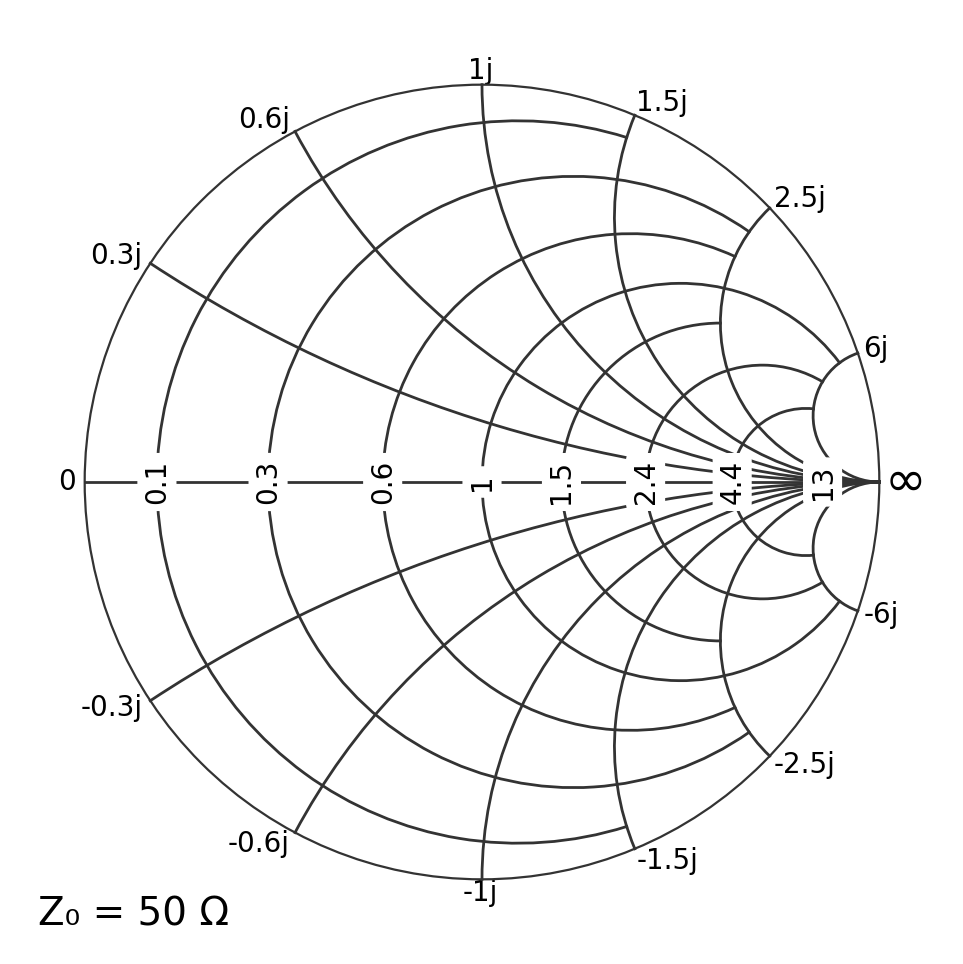

In [14]:
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection="smith")
plt.show()

In general, impedances are complex numbers.  The simplest way to plot with `pysmithchart` is to pass the complex numbers as values. The default expectation is that all numbers you supply should be *unnormalized* impedances in ohms.

- $Z = Z_0 + j0$ is the chart center (matched load).
- $Z = 2Z_0 + j0$ is to the right (higher resistance).
- $Z = 0.5Z_0 + j0$ is to the left (lower resistance).

You can pass complex values directly to `ax.plot(...)`, `ax.scatter(...)`, `ax.annotate(...)`, and `ax.text(...)`

> You might be concerned the usual plot call in **matplotlib** requires both `x` and `y` values, i.e., `ax.plot(x,y)`

> `pysmithplot` converts the complex impedance values to real and imaginary components internally.

> Two element plotting is still available if you do `ax.plot(z.imag, z.real)` 

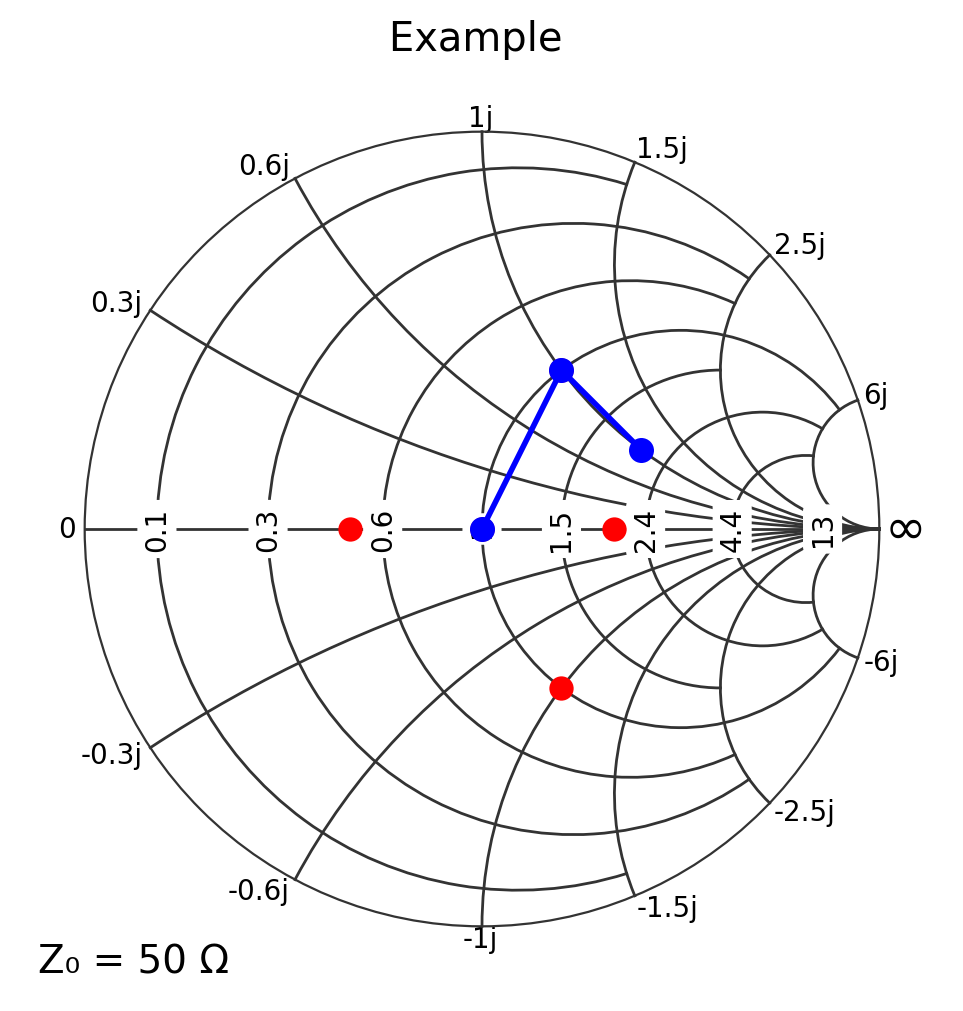

In [19]:
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection="smith")  # default Z0 = 50 Ω

Z0 = 50
Z_1 = [
    50 + 0j,  # matched load
    100 + 0j,  # higher resistance
    25 + 0j,  # lower resistance
    50 + 50j,  # inductive
    50 - 50j,  # capacitive
]
Z_2 = [50 + 0j, 50 + 50j, 100 + 50j]

ax.scatter(Z_points, s=60, color="red")
ax.plot(Z_2, "bo-", ms=8)

ax.set_title("Example ")
plt.show()

## 2. Add labels with `ax.text()`

Use `ax.text(z, "label", ...)` to place text next to the point `Z` in Smith chart.

Important: on a Smith chart, the displayed (screen) coordinates are **not** the same as the data coordinates.
For `pysmithchart`, the data coordinates represent the complex quantity you are plotting in the selected domain:

- In the default **impedance domain**, `x` and `y` correspond to \(\Re\{Z\}\) and \(\Im\{Z\}\) **in ohms**.
  (Internally, pysmithchart normalizes by \(Z_0\) for plotting.)
- If you plot reflection coefficient \(\Gamma\) with `domain=pysmithchart.REFLECTANCE_DOMAIN`, then `x` and `y` correspond to \(\Re\{\Gamma\}\) and \(\Im\{\Gamma\}\).

A practical trick is to apply a small offset (still in the same domain coordinates) so labels do not sit directly on markers.

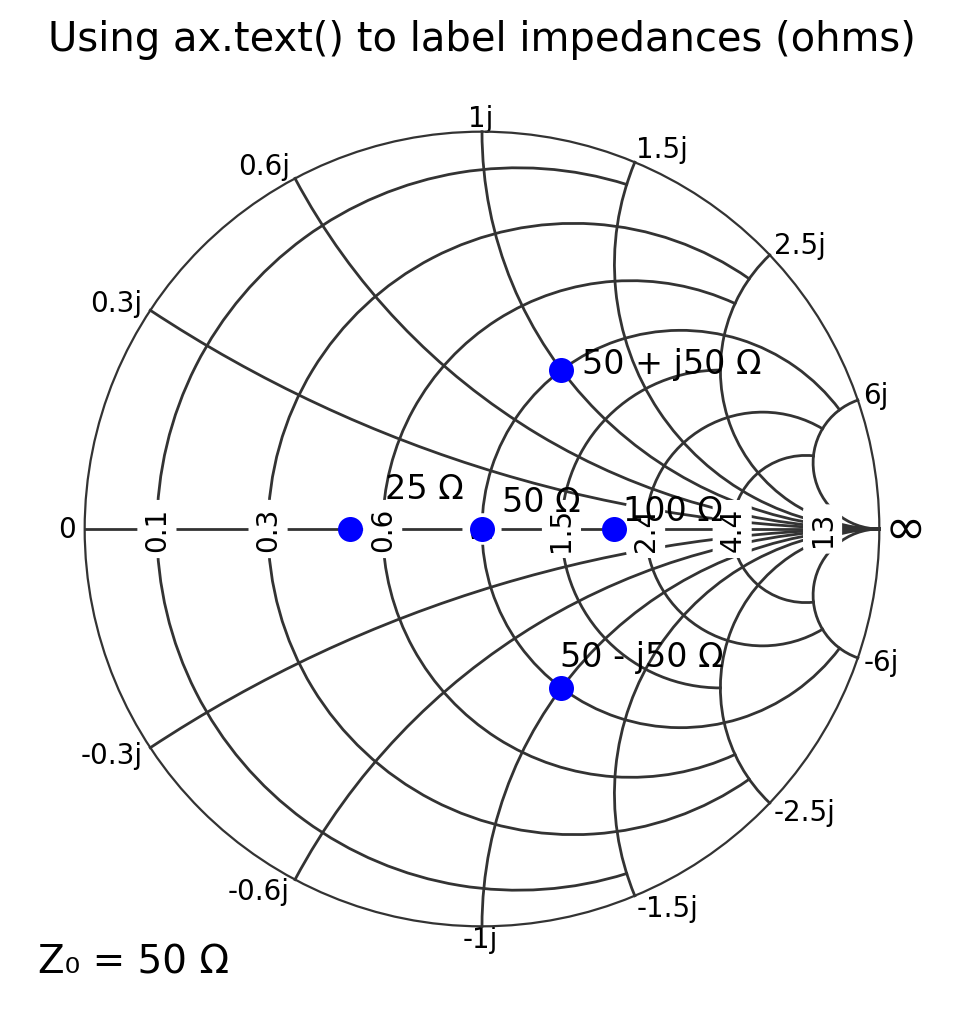

In [20]:
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection="smith")  # default Z0 = 50 Ω

Z0 = 50
Z = np.array([Z0 + 0j, 2 * Z0 + 0j, 0.5 * Z0 + 0j, Z0 + 1j * Z0, Z0 - 1j * Z0])
labels = ["50 Ω", "100 Ω", "25 Ω", "50 + j50 Ω", "50 - j50 Ω"]

ax.plot(Z, "bo", ms=8, ls="")

# Label each point (offset in ohms)
dx, dy = 5, 5
for Zi, s in zip(Z, labels):
    ax.text(Zi.real + dx, Zi.imag + dy, s)

ax.set_title("Using ax.text() to label impedances (ohms)")
plt.show()

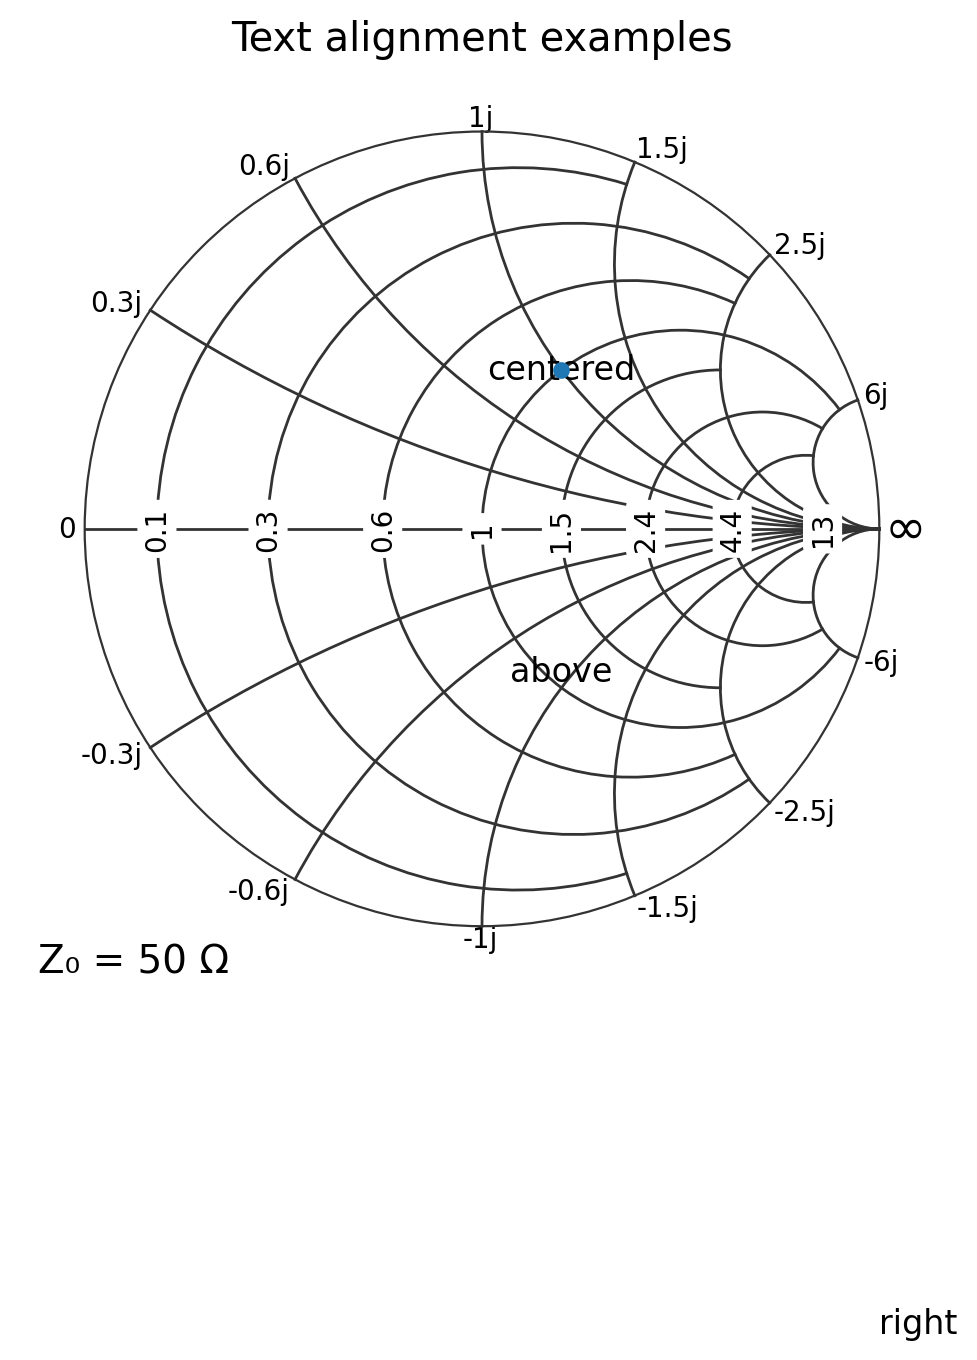

In [5]:
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection="smith")

z = (1 + 1j) * 50
ax.plot([z], marker="o", linestyle="")

ax.text(z.real, z.imag, "centered", ha="center", va="center")
ax.text(z.real, -z.imag, "above", ha="center", va="bottom")
ax.text(-z.real, -z.imag, "right", ha="left", va="center")

ax.set_title("Text alignment examples")
plt.show()

## Summary

- Importing `pysmithchart` registers the Matplotlib projection named `"smith"`.
- Create the axis with:
  ```python
  plt.figure(figsize=(6, 6))
  ax = plt.subplot(111, projection="smith")
  ```
- In the default **impedance domain**, pass complex impedances **in ohms**; pysmithchart normalizes internally by \(Z_0\).
- Use `ax.text(x, y, ...)` in the same **domain coordinates** as your plotted values.

Next recommended notebook: **Smith chart domains and normalization**.